# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2
# Negative feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objectives of this practical are:
- to become familiar with numerical integration of dynamical systems using scipy's odeint function.
- to become familiar with the basic models of gene regulation for basal expression and transcriptional repression.
- to understand the differences between unregulated gene expression and negative autoregulation.
- to explore the effects of saturation in the controller of an integral feedback control system
    
    

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical integration

We will use scipy's odeint function to numerically integrate ODEs. Here is an example:

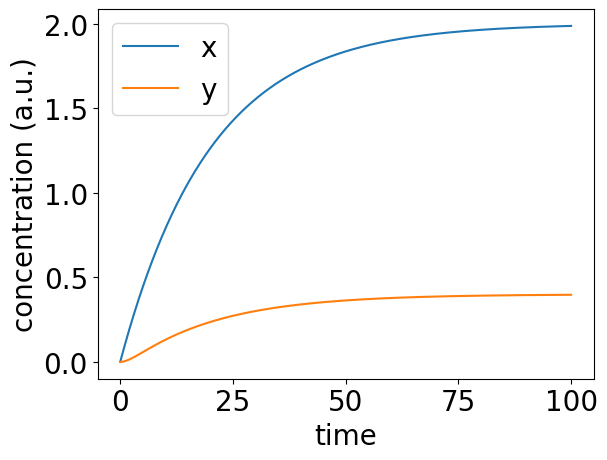

In [3]:
def test(xy,t):
    x,y=xy
    dx=alpha1-delta1*x
    dy=alpha2*x-delta2*y
    return [dx,dy]

alpha1 = 0.1
alpha2 = 0.1
delta1 = 0.05
delta2 = 0.5
tvec = np.arange(0,100,0.01)
x0 = [0,0]
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.plot(tvec,y[:,1],label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

# Constitutive expression

The following equation can be used to model the constitutive expression of a gene:
    
$$\frac{dP}{dt}=\alpha-\delta P$$

1. Consider $\alpha=10$ and $\delta = 1$.
    1. What is the analytic expression for the steady state of the system?
    2. Plot the time evolution of the system starting from $P_0=0$ using scipy's odeint function.
    3. Does the final value of the trajectory in b) coincide with the analytical steady state?
    4. At what time does P reach half the steady state value? Plot a vertical line at that point.


<span style="color:blue">
1- We have the differential equation that is dP/dt = a - dP and we want to get the analytical expression in steady state. We know that at steady state the change is 0 therefore we have the folloing equation: 0 = a - dP. Now we solve and we get that P = a/d reamains as the analytic expression for our system steady state. Now we can substitute P = 10/1 = 10 and get that the steady state value is 10.


2- The plot is done by using python functions below

3- Yes in the graph we can see that the final value of the tragectory coincides with the one obtained through the analytical expression

4- From the graph we can see that at time 0.75 P reaches the half steady state value
</span>

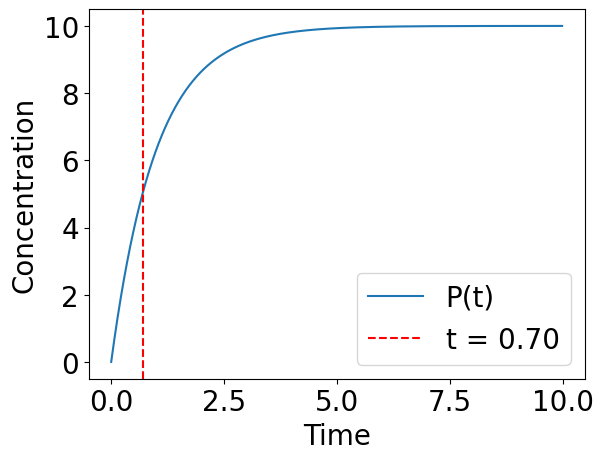

In [4]:
# Write your code here
def gene_expression(P, t, alpha, delta):
    return alpha - delta * P

alpha = 10
delta = 1
P0 = 0
tvec = np.arange(0, 10, 0.01)  # Time vector using np.arange

P = odeint(gene_expression, P0, tvec, args=(alpha, delta))

P_half = 5
half_time_idx = np.where(P >= P_half)[0][0]
half_time = tvec[half_time_idx]

plt.figure()
plt.plot(tvec, P, label='P(t)')
plt.axvline(x=half_time, color='r', linestyle='--', label=f't = {half_time:.2f}')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

2. What happens for the following parameter sets, in comparison with the previous one? Plot the four of them in the same plot and compare them. 
    1. alpha=10, delta=10
    2. alpha=100, delta=10
    3. alpha=100, delta=1
 

alpha=10, delta=1: Half steady state is reached at t = 0.70
alpha=10, delta=10: Half steady state is reached at t = 0.07
alpha=100, delta=10: Half steady state is reached at t = 0.07
alpha=100, delta=1: Half steady state is reached at t = 0.70


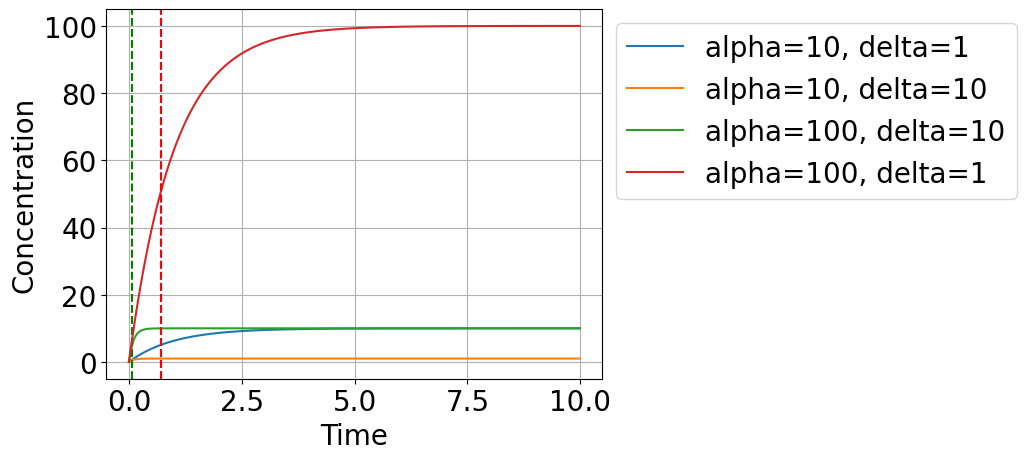

In [5]:
# Write your code here

def gene_expression(P, t, alpha, delta):
    return alpha - delta * P

def find_half_steady_state_time(P, tvec, alpha, delta):
    P_steady = alpha / delta
    half_steady = P_steady / 2

    time_index = np.where(P >= half_steady)[0][0]
    return tvec[time_index], half_steady

tvec = np.arange(0, 10, 0.01)

P0 = 0

plt.figure()

P1 = odeint(gene_expression, P0, tvec, args=(10, 1))
line1, = plt.plot(tvec, P1)

time1, half_steady1 = find_half_steady_state_time(P1, tvec, 10, 1)
plt.axvline(x=time1, color='blue', linestyle='--')

print(f"alpha=10, delta=1: Half steady state is reached at t = {time1:.2f}")

P2 = odeint(gene_expression, P0, tvec, args=(10, 10))
line2, = plt.plot(tvec, P2)

time2, half_steady2 = find_half_steady_state_time(P2, tvec, 10, 10)
plt.axvline(x=time2, color='orange', linestyle='--')

print(f"alpha=10, delta=10: Half steady state is reached at t = {time2:.2f}")

P3 = odeint(gene_expression, P0, tvec, args=(100, 10))
line3, = plt.plot(tvec, P3)

time3, half_steady3 = find_half_steady_state_time(P3, tvec, 100, 10)
plt.axvline(x=time3, color='green', linestyle='--')

print(f"alpha=100, delta=10: Half steady state is reached at t = {time3:.2f}")

P4 = odeint(gene_expression, P0, tvec, args=(100, 1))
line4, = plt.plot(tvec, P4)

time4, half_steady4 = find_half_steady_state_time(P4, tvec, 100, 1)
plt.axvline(x=time4, color='red', linestyle='--')

print(f"alpha=100, delta=1: Half steady state is reached at t = {time4:.2f}")

plt.legend([line1, line2, line3, line4], 
           ['alpha=10, delta=1', 
            'alpha=10, delta=10', 
            'alpha=100, delta=10', 
            'alpha=100, delta=1'],
           loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

<span style="color:blue">
The final concentration is given by the following expression P = a/d. Therefore increasing alpha and decreasing delta will increase the final concentration. It is also possible to notice that delta expresses the speed at which the final concentration is reached meaning a higher delta the faster it will be. Regarding the half steady state the main factor affecting it is delta as it affects the speed of the reaction.
</span>

# Negative feedback

Now consider the following negative autoregulation system:


$$\frac{dR}{dt}=\frac{\alpha}{1+\left(\frac{R}{K}\right)^n} - \delta R$$

1. Plot the production term for alpha=5, K=1, and n ranging from 1 to 6, for a range of R values from 0 to 5. What is the effect of increasing n?

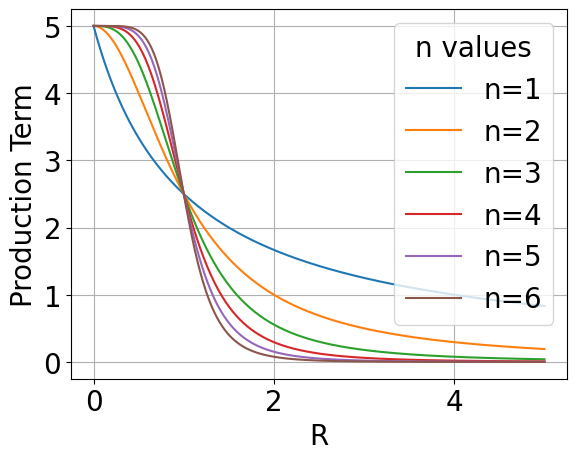

In [6]:
# Write your code here

def production_term(R, alpha, K, n):
    return alpha / (1 + (R/K)**n)

alpha = 5
K = 1
R_values = np.linspace(0, 5, 500)
n_values = range(1, 7)

plt.figure()

for n in n_values:
    P_R = production_term(R_values, alpha, K, n)
    plt.plot(R_values, P_R, label=f'n={n}')

plt.xlabel('R')
plt.ylabel('Production Term')
plt.legend(title='n values')
plt.grid(True)
plt.show()

<span style="color:blue">
We can see that the increase of n makes our system more sensitive regarding R concentration. For higher n, small changes in R near K produces drastic reduction in production (stronger negative feedback regulation). On the other hand for smaller n the production decreases gradually as R increases meaning we have a less sensitive sistem and the production decreases less drastically.
</span>

2. Now fix n to 4, and plot the production term for K = 1, 2, and 4. What is the effect?

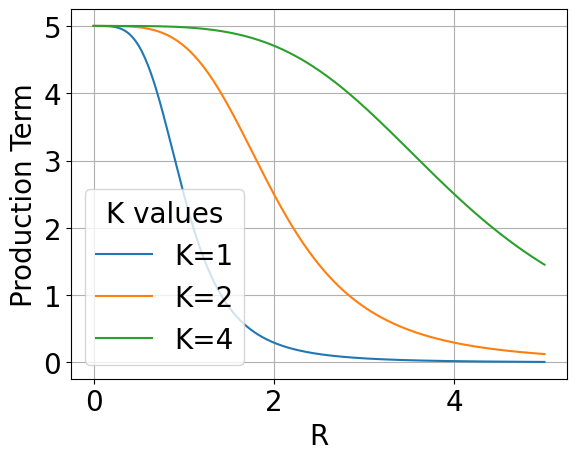

In [7]:
# Write your code here

alpha = 5
n = 4
R_values = np.linspace(0, 5, 500)
K_values = [1, 2, 4]

plt.figure()

for K in K_values:
    P_R = production_term(R_values, alpha, K, n)
    plt.plot(R_values, P_R, label=f'K={K}')

plt.xlabel('R')
plt.ylabel('Production Term')
plt.legend(title='K values')
plt.grid(True)
plt.show()

<span style="color:blue">

</span>

<span style="color:blue">
From the created graph it is possible to see that the increase of K results in a reduction fo the sensitivity on the production term to changes in R. When K increases the system allows higher concentrations of R that have a lower impact on the prodution which tells us that the negative feddback regulation is less effective at higher K values.
</span>

3. If you wanted to build a repression system that is highly repressed at low values of repressor, how would you choose K and n? (in terms of low/high values) 

<span style="color:blue">
To build a repression system that is highly repressed at lower values of repressor I would choose a low value of k and a high value of n.

At lower K the system responds more sensitively to lower concentrations of repressors leding to a more pronunced effect on the production term at lower repressor levels meaning we have a reduction in the production much more early, when the repressr has a low concentration.

Larger n increases the stepness of the curve near k making a big production drop as the concentration reaches K amplifying the repressive effect and making the negative feedback regulation strong even at low repression concentrations.
</span>

# Study the response timescale of the system:

1. We will now compare how quickly the two models introduce above generate their product. To that end:
    1. Integrate the negative feedback model for $n=4$, $K=1$, $\alpha=10$ and $\delta=1$, starting from $R=0$ and compute the time to reach half the steady state concentration.
    2. Integrate the constitutive expression model with $\alpha=1.5$ and $\delta=1$ starting from $R=0$ and compute the time to reach half the steady state concentration. 
    3. Compare the results of B) and C).

Negative Feedback Model: Time to reach half steady state = 10.00 time units
Constitutive Expression Model: Time to reach half steady state = 0.69 time units


/tmp/ipykernel_15410/3086702042.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


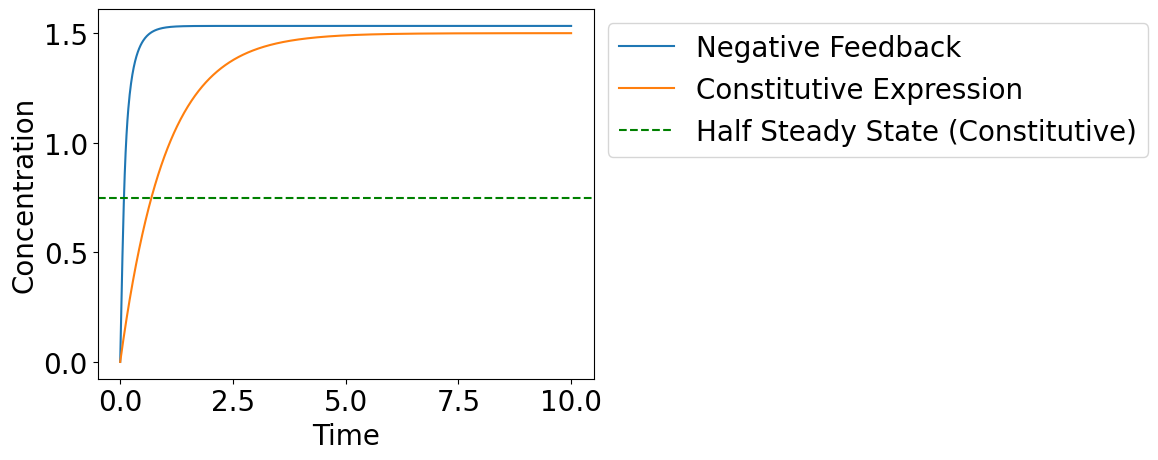

In [13]:
#Negative feedback model
def negative_feedback(R, t, alpha, K, n, delta):
    return (alpha / (1 + (R/K)**n)) - delta * R

#Parameters for the model
alpha = 10
K = 1
n = 4
delta = 1
R0 = 0
tvec = np.linspace(0, 10, 1000) # time frame

#Solve  model
R_sol = odeint(negative_feedback, R0, tvec, args=(alpha, K, n, delta))

#Steady state and half steady state for negative feedback model
steady_state = alpha / delta
half_steady_state = steady_state / 2

#Find time to reach half steady state using interpolation
time_to_half = np.interp(half_steady_state, R_sol.flatten(), tvec)

print(f"Negative Feedback Model: Time to reach half steady state = {time_to_half:.2f} time units")

#Constitutive expression model function
def constitutive_expression(P, t, alpha, delta):
    return alpha - delta * P

#Parameters for constitutive expression model
alpha_const = 1.5
delta_const = 1
P0 = 0

#Time vector for integration
tvec_const = np.linspace(0, 10, 1000)

#Solve the constitutive expression model
P_sol = odeint(constitutive_expression, P0, tvec_const, args=(alpha_const, delta_const))

#Steady state and half steady state for constitutive expression model
steady_state_const = alpha_const / delta_const
half_steady_state_const = steady_state_const / 2

#Find time to reach half steady state using interpolation
time_to_half_const = np.interp(half_steady_state_const, P_sol.flatten(), tvec_const)

print(f"Constitutive Expression Model: Time to reach half steady state = {time_to_half_const:.2f} time units")

plt.plot(tvec, R_sol, label='Negative Feedback')
#plt.axhline(half_steady_state, color='r', linestyle='--', label='Half Steady State (Negative Feedback)')
plt.plot(tvec_const, P_sol, label='Constitutive Expression')
plt.axhline(half_steady_state_const, color='g', linestyle='--', label='Half Steady State (Constitutive)')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

# Adjust layout to prevent clipping
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


<span style="color:blue">** The negative feedback model reaches half its steady-state faster than the constitutive expression model due to its regulatory mechanism, while the constitutive model responds more slowly without feedback. **</span>

# Adaptation to perturbations

Integrate the negative feedback model for n=4, K=1, $\alpha=10$ and $\delta=1$, starting from R=0, for 10 time units. At that point, double the value of $\alpha$ and integrate for another 10 time units. Does the system return to the same steady state as before?

Steady State Before Perturbation:  10.0
Steady State After Perturbation:  20.0


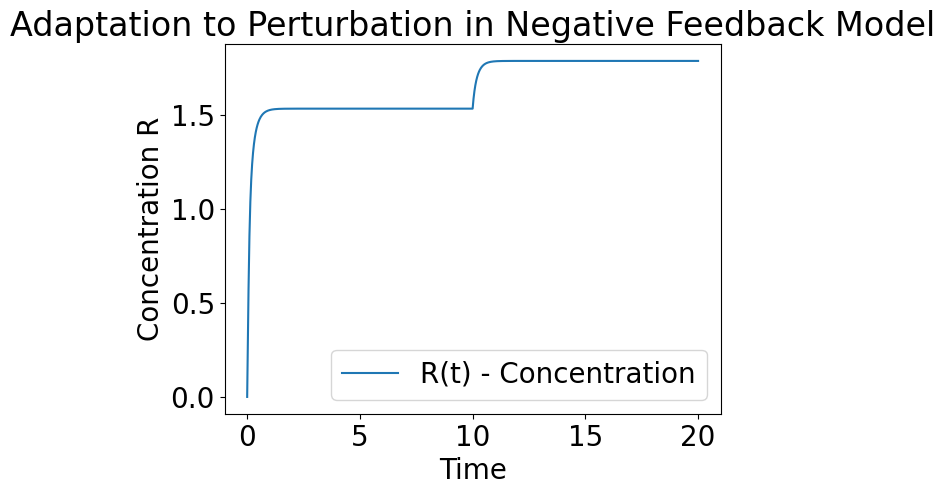

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Negative feedback model function
def negative_feedback(R, t, alpha, K, n, delta):
    return (alpha / (1 + (R/K)**n)) - delta * R

# Parameters
K = 1
n = 4
delta = 1
R0 = 0

# Time vector for the first 10 time units
tvec1 = np.linspace(0, 10, 500)

# Initial alpha value
alpha1 = 10

# Solve for the first phase (0 to 10 time units)
R_sol1 = odeint(negative_feedback, R0, tvec1, args=(alpha1, K, n, delta))

# Time vector for the next 10 time units (10 to 20)
tvec2 = np.linspace(10, 20, 500)

# Double the alpha value after 10 time units
alpha2 = 20

# Use the last value of R from the first phase as the initial condition for the second phase
R0_phase2 = R_sol1[-1]

# Solve for the second phase (10 to 20 time units)
R_sol2 = odeint(negative_feedback, R0_phase2, tvec2, args=(alpha2, K, n, delta))

# Combine the time vectors and solutions for plotting
tvec_total = np.concatenate((tvec1, tvec2))
R_sol_total = np.concatenate((R_sol1, R_sol2))

# Steady states
steady_state_before = alpha1 / delta
steady_state_after = alpha2 / delta

print('Steady State Before Perturbation: ', steady_state_before)
print('Steady State After Perturbation: ', steady_state_after)

# Plot the results
plt.plot(tvec_total, R_sol_total, label='R(t) - Concentration')
#plt.axhline(steady_state_before, color='r', linestyle='--', label='Steady State Before Perturbation')
#plt.axhline(steady_state_after, color='g', linestyle='--', label='Steady State After Perturbation')
plt.xlabel('Time')
plt.ylabel('Concentration R')
plt.legend(loc='best')
plt.title('Adaptation to Perturbation in Negative Feedback Model')
plt.show()


<span style="color:blue">** No, the steady state before the perturbation was 10, now, after the perturbation, the value of the steady state has risen to 20. **</span>

Do the same for the constitutive expression model.

/tmp/ipykernel_15410/891064976.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


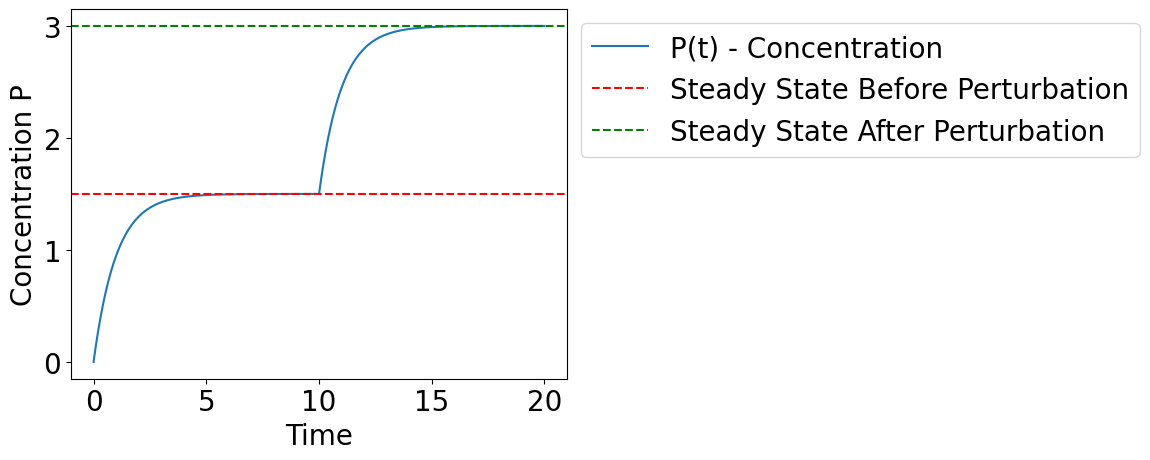

In [10]:
# Constitutive expression model function
def constitutive_expression(P, t, alpha, delta):
    return alpha - delta * P

# Parameters for the constitutive expression model
delta = 1
P0 = 0

# Time vector for the first 10 time units
tvec1 = np.linspace(0, 10, 500)

# Initial alpha value
alpha1 = 1.5

# Solve for the first phase (0 to 10 time units)
P_sol1 = odeint(constitutive_expression, P0, tvec1, args=(alpha1, delta))

# Time vector for the next 10 time units (10 to 20)
tvec2 = np.linspace(10, 20, 500)

# Double the alpha value after 10 time units
alpha2 = 3.0

# Use the last value of P from the first phase as the initial condition for the second phase
P0_phase2 = P_sol1[-1]

# Solve for the second phase (10 to 20 time units)
P_sol2 = odeint(constitutive_expression, P0_phase2, tvec2, args=(alpha2, delta))

# Combine the time vectors and solutions for plotting
tvec_total = np.concatenate((tvec1, tvec2))
P_sol_total = np.concatenate((P_sol1, P_sol2))

# Steady states
steady_state_before = alpha1 / delta
steady_state_after = alpha2 / delta

# Plot the results
plt.plot(tvec_total, P_sol_total, label='P(t) - Concentration')
plt.axhline(steady_state_before, color='r', linestyle='--', label='Steady State Before Perturbation')
plt.axhline(steady_state_after, color='g', linestyle='--', label='Steady State After Perturbation')
plt.xlabel('Time')
plt.ylabel('Concentration P')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap and clipping
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


<span style="color:blue">** The same hapens with the constitutive expression model but in this case the steady state before the perturbation was 1.5 and after the perturbation it increased to 3.**</span>

Interpret the results above in terms of the difference in robustness between the two models.

<span style="color:blue">** The negative feedback model seems to be more robust since it changed more rapidly than the constitutive expression model which took around 5 min to adapt. So the negative feedback model adapts more quickly to perturbations and stabilizes more afficiently enhancing robustness by recovering the steady state faster thanks to this regulation that the constitutive expression model does not have. **</span>